<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#2196F3;font-family:sans-serif;color:#f1ffffff;font-size:250%;text-align:center;border-radius:15px 15px;">Airbnb 2016 Dataset</p>


# Introduction 😃😃

## Airbnb 2016 Dataset

Since its inception in 2008, Airbnb has transformed travel by offering guests and hosts unique, personalized experiences. Today, Airbnb is a globally recognized service. Analyzing the millions of listings on Airbnb is essential for the company, as this vast data can be used to enhance security, inform business decisions, understand customer and host behavior, drive marketing strategies, and implement new services.

## We have 3 Dataset.
- 1- Full Project 
- 2- sheet_name = Calendar
- 3- sheet_name = Reviews


# Work plan ❤️ 

- Analyze and explore data 🤝 
- Data Visualization 🤝


### I will draw my own opinion 

In [17]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS
import re
import folium

In [24]:
#Importing the dataset

df_calendar =pd.read_excel(r"C:\Users\ADMIN\Project Tableau\Tableau Full Project.xlsx",sheet_name="Calendar")
df_listins =pd.read_excel(r"C:\Users\ADMIN\Project Tableau\Tableau Full Project.xlsx",sheet_name="Listings")
df_reviews =pd.read_excel(r"C:\Users\ADMIN\Project Tableau\Tableau Full Project.xlsx",sheet_name="Reviews")
df =pd.read_excel(r"C:\Users\ADMIN\Project Tableau\Tableau Full Project.xlsx")


In [27]:
# # look the data set - Calender

df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [29]:
# looking the shape DataSet
df_calendar.shape

(1048575, 4)

- We have 4 columns and 1 M rows

In [31]:
#Checking the dtypes of all the columns

df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1048575 non-null  int64         
 1   date        1048575 non-null  datetime64[ns]
 2   available   1048575 non-null  object        
 3   price       699862 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.0+ MB


In [33]:
# look  describe data set
df_calendar["price"].describe().round(2)

count    699862.00
mean        140.46
std         106.49
min          10.00
25%          75.00
50%         110.00
75%         168.00
max        1650.00
Name: price, dtype: float64

In [35]:
#checking null value 
df_calendar.isnull().sum() * 100 / len(df_calendar)

listing_id     0.000000
date           0.000000
available      0.000000
price         33.255895
dtype: float64

- We have 33% missing value

In [37]:
#checking duplicated value 

df_calendar.duplicated().sum()

0

- No duplicated value in Date Set Calendar => Noice

In [40]:
# repeat t or f in column available

sns.countplot(df_calendar["available"])

ValueError: could not convert string to float: 't'

- I don`t know what mean t or f
- t =66%
- f =34%

<AxesSubplot:xlabel='date', ylabel='price'>

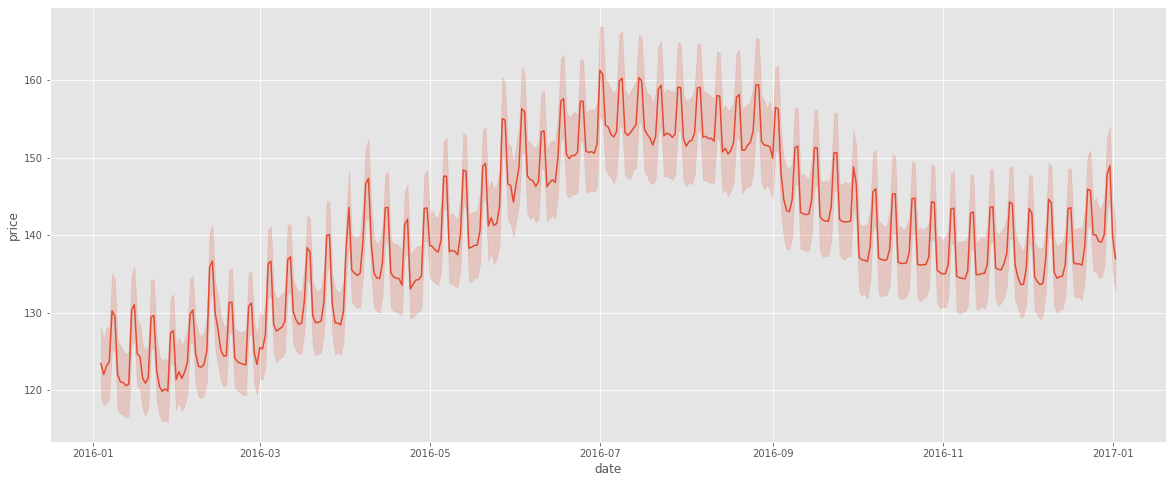

In [10]:
# show price effect in the different dates 

plt.figure(figsize=(20,8))
sns.lineplot(data=df_calendar,x="date",y="price")

- We could say the price raising the summer season , because increase people order to travel

# End part 1 / Calendar

In [42]:
# look the data set - listins

df_listins.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [44]:
# looking the shape DataSet
df_listins.shape

(3818, 92)

In [13]:
# look the data set - Full project

df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
# looking the shape DataSet
df.shape

(3818, 92)

## - Data set  df_listins the same df - Data full project

In [15]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   datetime64[ns]
 4   name                              3818 non-null   object        
 5   summary                           3639 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2206 non-null 

In [16]:
#checking duplicated value 

df.duplicated().sum()

0

- - No any duplicated value

### - We have 92 columns, I need some Columns

In [17]:
# select some columns 

df_new = df[["id","bathrooms","cleaning_fee","number_of_reviews","latitude","longitude","room_type","country","bedrooms","price"]]
df_new

,id,bathrooms,cleaning_fee,number_of_reviews,latitude,longitude,room_type,country,bedrooms,price
0,241032,1.0,NaN,207,47.636289,-122.371025,Entire home/apt,United States,1.0,85
1,953595,1.0,40.0,43,47.639123,-122.365666,Entire home/apt,United States,1.0,150
2,3308979,4.5,300.0,20,47.629724,-122.369483,Entire home/apt,United States,5.0,975
3,7421966,1.0,NaN,0,47.638473,-122.369279,Entire home/apt,United States,0.0,100
4,278830,2.0,125.0,38,47.632918,-122.372471,Entire home/apt,United States,3.0,450
...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2.0,230.0,1,47.664295,-122.359170,Entire home/apt,United States,3.0,359
3814,8902327,1.0,50.0,2,47.649552,-122.318309,Entire home/apt,United States,1.0,79
3815,10267360,1.0,35.0,0,47.508453,-122.240607,Entire home/apt,United States,1.0,93
3816,9604740,1.0,45.0,0,47.632335,-122.275530,Entire home/apt,United States,0.0,99


In [18]:
# look  describe data set
df_new.describe().round(2)

,id,bathrooms,cleaning_fee,number_of_reviews,latitude,longitude,bedrooms,price
count,3818.00,3802.00,2788.00,3818.00,3818.00,3818.00,3812.00,3818.00
mean,5550111.42,1.26,61.71,22.22,47.63,-122.33,1.31,127.98
std,2962660.48,0.59,48.83,37.73,0.04,0.03,0.88,90.25
min,3335.00,0.00,5.00,0.00,47.51,-122.42,0.00,20.00
25%,3258256.25,1.00,25.00,2.00,47.61,-122.35,1.00,75.00
50%,6118244.50,1.00,50.00,9.00,47.62,-122.33,1.00,100.00
75%,8035126.75,1.00,83.00,26.00,47.66,-122.31,2.00,150.00
max,10340165.00,8.00,300.00,474.00,47.73,-122.24,7.00,1000.00


In [19]:
# let's see how many the user reservation accommodates 

df_new["id"].value_counts()

241032      1
9299824     1
8597687     1
2309250     1
7420339     1
           ..
4243163     1
4569115     1
4464824     1
9258513     1
10208623    1
Name: id, Length: 3818, dtype: int64

- All users reservation one time

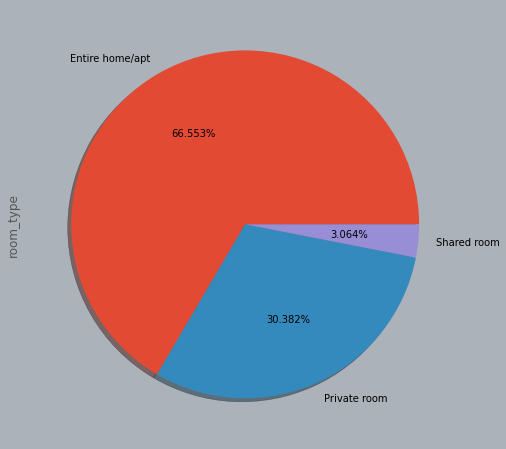

In [20]:
# show the room type

plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df_new["room_type"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

- Most of people prefer reservation Entire home

In [21]:
# made group by based room type

df_new.groupby("room_type")["cleaning_fee","price"].mean().round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,cleaning_fee,price
room_type,,
Entire home/apt,74.02,155.84
Private room,26.56,75.04
Shared room,27.23,47.55


In [22]:
# active graph 

plt.figure(figsize=(20,7))
px.scatter(df_new, x="bedrooms",y="price",animation_frame="room_type")

<Figure size 1440x504 with 0 Axes>

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

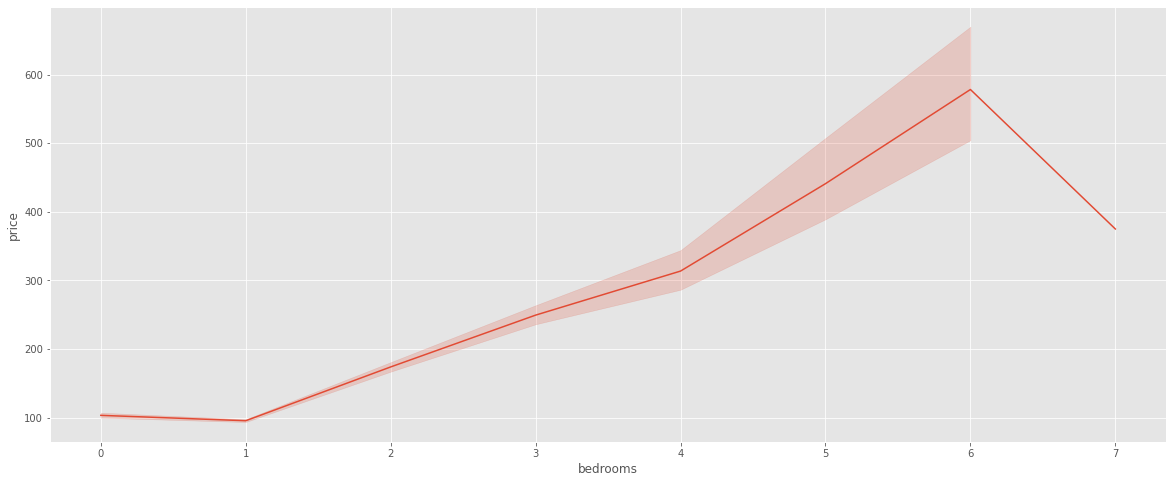

In [23]:
# graph bedroom and price 

plt.figure(figsize=(20,8))
sns.lineplot(data=df_new, x="bedrooms",y="price")


- The price depend on the number bedrooms , when increasing number bedroom , the price rise

In [24]:
# Draw the Map

sanfran_map=folium.Map(location=[47.636289,-122.371025])

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_new.latitude ,df_new.longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
          color='red'
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

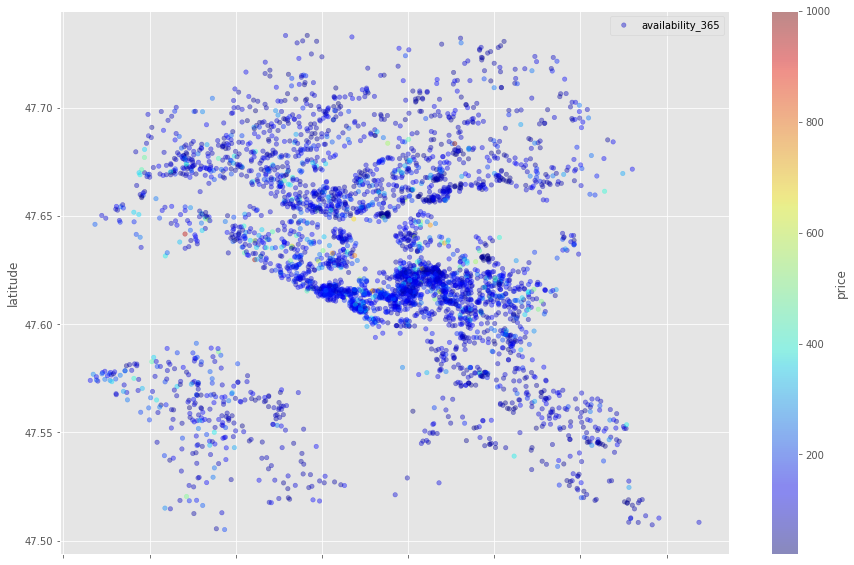

In [25]:
#let's see how scatterplot will come out 
viz=df_new.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(15,10))
viz.legend()

- All locations in USA

# End part 2 - Full project

In [26]:
# look the data set - Reviews

df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [27]:
# looking the shape DataSet
df_reviews.shape

(84849, 6)

In [28]:
# let's see how many the user reservation accommodates 

df_reviews["id"].value_counts()

38917982    1
16356159    1
16077097    1
15916229    1
15774020    1
           ..
47171114    1
46867613    1
46373502    1
46119935    1
56429621    1
Name: id, Length: 84849, dtype: int64

In [29]:
#checking duplicated value 

df_reviews.duplicated().sum()

0

<AxesSubplot:xlabel='date'>

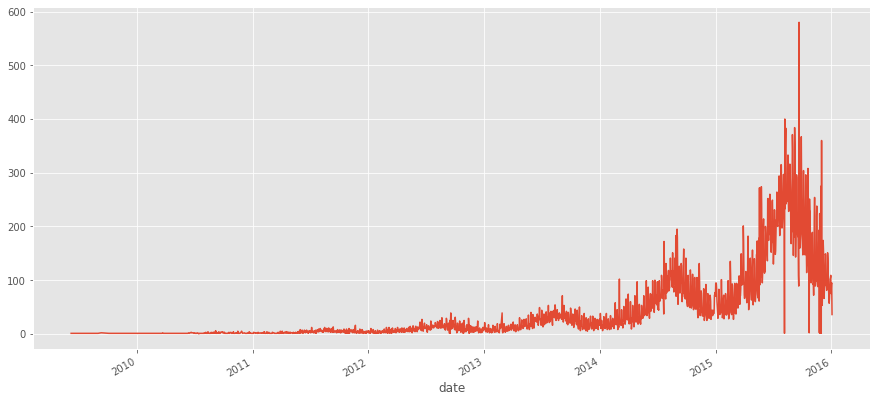

In [30]:
# How many comments depends on date

df_reviews.groupby("date")["comments"].count().plot(figsize=(15,7))

- The people not writing comments in the past, after 2014 the people interest writing , and more comments in summer season.

In [31]:
# Length of word in sentence
df_reviews['Length'] = df_reviews['comments'].str.len()
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Length
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,53.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,414.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",410.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,278.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,346.0


In [32]:
df_reviews['Length'].describe().round(2)

count    84830.00
mean       389.82
std        304.06
min          1.00
25%        193.00
50%        316.00
75%        496.00
max       3556.00
Name: Length, dtype: float64

<AxesSubplot:xlabel='date', ylabel='Length'>

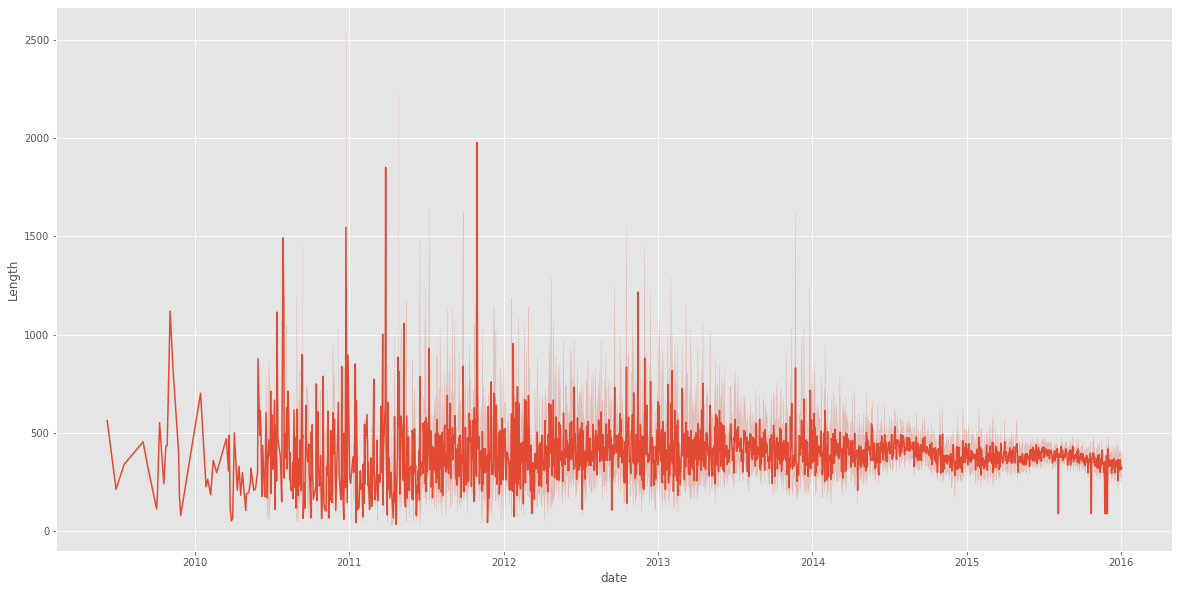

In [33]:
# any relation between length comments and date

plt.figure(figsize=(20,10))
sns.lineplot(data=df_reviews, x="date",y="Length")

- we see after 2014 the people writing short comments

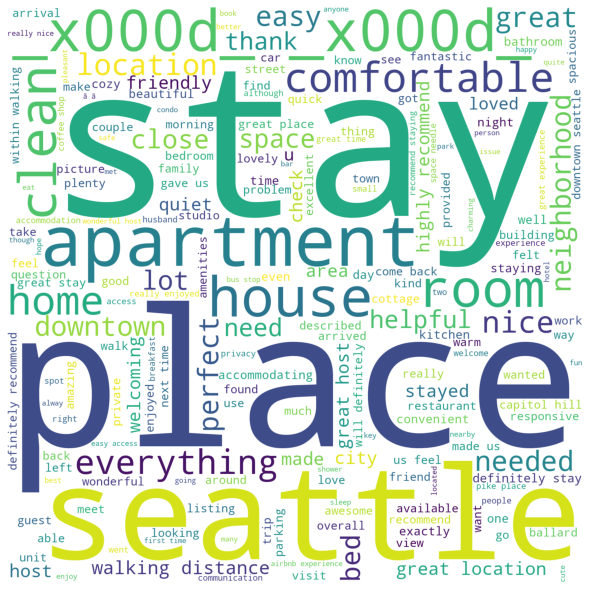

In [34]:
# draw the comments / most comments

comment_words = ''
stopwords = set(STOPWORDS)


# iterate through the csv file
for val in df_reviews.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1500, height = 1500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# End part 3 / Dataset_reviews

# Analysis Results😃😃😃

# Airbnb 2016 Dataset

### 1- Dataset -> Calendar

- We have 4 columns and 1 M rows
- 4 columns -> listing_id & date & available & price
- We have 33% missing value- in price column.
- No duplicated value in Date Set Calendar
- The price raising the summer season , because increase people order to travel.


-----------

### 2- Dataset -> Full Project

- We have 92 columns and 3818 rows
- I took some columns for analysis.
- All users reservation one time
- Most of people prefer reservation Entire home

	
#### Room_type	   avg  cleaning_fee           	
- Entire home/apt	   74.02	            
- Private room	           26.56	                    
- Shared room	           27.23	                  

#### Room_type	             	price	
- Entire home/apt	   155.84
- Private room	           75.04
- Shared room	           47.55


- The price depend on the number bedrooms , when increasing number bedroom , the price rise

- All the homes in United States 


-------------


### 3- Dataset -> Reviews 
 
 - We have 6 columns and 84849rows

- The people not writing comments in the past, after 2014 the people interest writing , and more comments in summer season.

 - After 2014 the people writing short comments
